In [1]:
# Task 1
import pandas as pd #use pandas to read files and for data wrangling
#read the csv file and name the variables
automobile = pd.read_csv('Automobile.csv', sep='#', decimal='.', header=None,
                        names=['Symboling', 'Normalised losses', 'Make', 'Fuel type', 'Aspiration', 'Num of doors', 'Body style', 'Drive wheels', 'Engine location', 'Wheel base', 'Length', 'Width', 'Height', 'Curb weight', 'Engine type', 'Num of cylinders', 'Engine size', 'Fuel system', 'Bore', 'Stroke', 'Compression ratio', 'Horsepower', 'Peak rpm', 'City mpg', 'Highway mpg', 'Price'])
automobile.head() #calls the first few rows of the set so i can look at it

,Symboling,Normalised losses,Make,Fuel type,Aspiration,Num of doors,Body style,Drive wheels,Engine location,Wheel base,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
automobile.dtypes #shows the data types of the variables in this dataset
automobile['Symboling']=pd.Categorical(automobile.Symboling, ordered=True, categories=[-3,-2,-1,0,1,2,3]) #convert to ordinal variable
automobile['Make']=pd.Categorical(automobile.Make, ordered=False) #converts to categorical dtype with no order
automobile['Num of doors']=pd.Categorical(automobile['Num of doors'], ordered=False)
automobile['Drive wheels']=pd.Categorical(automobile['Drive wheels'], ordered=False) 
automobile['Fuel type']=pd.Categorical(automobile['Fuel type'], ordered=False) 
automobile['Aspiration']=pd.Categorical(automobile.Aspiration, ordered=False) 
automobile['Body style']=pd.Categorical(automobile['Body style'], ordered=False) 
automobile['Drive wheels']=pd.Categorical(automobile['Drive wheels'], ordered=False) 
automobile['Engine location']=pd.Categorical(automobile['Engine location'], ordered=False) 
automobile['Fuel system']=pd.Categorical(automobile['Fuel system'], ordered=False) 
automobile['Num of cylinders']=pd.Categorical(automobile['Num of cylinders'], ordered=False)
automobile['Engine type']=pd.Categorical(automobile['Engine type'], ordered=False) 
automobile.dtypes

Symboling            category
Normalised losses     float64
Make                 category
Fuel type            category
Aspiration           category
Num of doors         category
Body style           category
Drive wheels         category
Engine location      category
Wheel base            float64
Length                float64
Width                 float64
Height                float64
Curb weight             int64
Engine type          category
Num of cylinders     category
Engine size             int64
Fuel system          category
Bore                  float64
Stroke                float64
Compression ratio     float64
Horsepower            float64
Peak rpm              float64
City mpg                int64
Highway mpg             int64
Price                 float64
dtype: object

In [3]:
# replace NA values with the mean of the numerical columns
automobile=automobile.fillna(automobile.mean(axis=0)) 

In [4]:
automobile['Normalised losses'].value_counts() #no impossible values
automobile['Normalised losses'].isnull().values.any() #no missing values

False

In [5]:
automobile['Symboling'].isnull().values.any() #none found
#now do a sanity check on integer values
automobile['Symboling'].value_counts() # the 4 value is impossible on this scale.
automobile.loc[automobile['Symboling'] == 4] #used this to locate the rows where the impossible value is
automobile['Symboling'].replace(4,3, inplace=True)     #replace with the nearest value which is 3
automobile['Symboling'].value_counts()

0     67
1     54
-1    52
2     32
3     27
-2     3
-3     0
Name: Symboling, dtype: int64

In [6]:
automobile['Make'].isnull().values.any() #none found
#Identify redundant white spaces in strings by using value_counts() function to show categories
automobile['Make'].value_counts()
automobile['Make'] = automobile['Make'].str.strip() #redundant white space identified in volvo
automobile['Make'].value_counts() #mismatch capitals in peugot and nissan 
automobile['Make'] = automobile['Make'].str.upper() #converts values to uppercase
automobile['Make'] = automobile['Make'].str.replace('VOL00112OV', 'VOLVO') #replaces the incorrect value with volvo
automobile['Make'].value_counts()

VOLVO            44
TOYOTA           32
NISSAN           18
MAZDA            17
HONDA            13
MITSUBISHI       13
SUBARU           12
VOLKSWAGEN       12
PEUGOT           11
DODGE             9
BMW               8
MERCEDES-BENZ     8
PLYMOUTH          7
AUDI              7
SAAB              6
PORSCHE           5
ISUZU             4
JAGUAR            3
ALFA-ROMERO       3
CHEVROLET         3
RENAULT           2
MERCURY           1
Name: Make, dtype: int64

In [7]:
automobile['Fuel type'].isnull().values.any() #no nan values
automobile['Fuel type'].value_counts() #appears to be redundant white space and inconsistent capitalisation
automobile['Fuel type'] = automobile['Fuel type'].str.strip() #redundant white space identified
automobile['Fuel type'] = automobile['Fuel type'].str.upper() #replace capitals with uppercase for consistency
automobile['Fuel type'].value_counts()

GAS       210
DIESEL     28
Name: Fuel type, dtype: int64

In [8]:
automobile['Aspiration'].isnull().values.any() # none
automobile['Aspiration'].value_counts() #inconsistencies found
automobile['Aspiration'] = automobile['Aspiration'].str.strip() #for any redundant white space 
automobile['Aspiration'] = automobile['Aspiration'].str.upper() #replace capitals with uppercase for consistency
automobile['Aspiration'] = automobile['Aspiration'].str.replace('TURRRRBO', 'TURBO') #replaces the incorrect value
automobile['Aspiration'].value_counts()

STD      178
TURBO     60
Name: Aspiration, dtype: int64

In [9]:
automobile['Num of doors'].isnull().values.any() #yes nan found
automobile['Num of doors'] = automobile['Num of doors'].fillna(automobile['Num of doors'].mode()[0]) #replaces nan values with the mode
automobile['Num of doors'].isnull().values.any() # no more nan values
automobile['Num of doors'].value_counts() # Show inconsistencies in data
automobile['Num of doors'] = automobile['Num of doors'].str.upper() #replace capitals with uppercase for consistency
automobile['Num of doors'] = automobile['Num of doors'].str.strip() #removes any redundant white space 
automobile['Num of doors'] = automobile['Num of doors'].str.replace('FOURR', 'FOUR') #replaces the incorrect value
automobile['Num of doors'].value_counts()

FOUR    149
TWO      89
Name: Num of doors, dtype: int64

In [10]:
automobile['Body style'].value_counts()
automobile['Body style'] = automobile['Body style'].str.strip() #removes any redundant white space 
automobile['Body style'] = automobile['Body style'].str.upper() #replace capitals with uppercase for consistency
automobile['Body style'].value_counts()

SEDAN          127
HATCHBACK       70
WAGON           27
HARDTOP          8
CONVERTIBLE      6
Name: Body style, dtype: int64

In [11]:
automobile['Drive wheels'].value_counts()
automobile['Drive wheels'] = automobile['Drive wheels'].str.upper() #replace capitals with uppercase for consistency
automobile['Drive wheels'] = automobile['Drive wheels'].str.strip() #removes any redundant white space 
automobile['Drive wheels'].value_counts()

FWD    120
RWD    109
4WD      9
Name: Drive wheels, dtype: int64

In [12]:
automobile['Engine location'].value_counts()
automobile['Engine location'] = automobile['Engine location'].str.upper() #replace capitals with uppercase for consistency
automobile['Engine location'] = automobile['Engine location'].str.strip() #removes any redundant white space 
automobile['Engine location'].value_counts()

FRONT    235
REAR       3
Name: Engine location, dtype: int64

In [13]:
automobile['Fuel system'].value_counts()
automobile['Fuel system'] = automobile['Fuel system'].str.strip() #removes any redundant white space 
automobile['Fuel system'] = automobile['Fuel system'].str.upper() #replace capitals with uppercase for consistency
automobile['Fuel system'].value_counts()

MPFI    119
2BBL     66
IDI      28
1BBL     11
SPDI      9
4BBL      3
SPFI      1
MFI       1
Name: Fuel system, dtype: int64

In [14]:
automobile['Engine type'].value_counts() 
automobile['Engine type'] = automobile['Engine type'].str.strip() #removes any redundant white space 
automobile['Engine type'] = automobile['Engine type'].str.upper() #replace capitals with uppercase for consistency
automobile['Engine type'] = automobile['Engine type'].str.replace('DOHCV', 'DOHC') #DOHCV type doesn't exist, replace with closest value
automobile['Engine type'].value_counts() 

OHC      176
OHCV      18
OHCF      15
DOHC      13
L         12
ROTOR      4
Name: Engine type, dtype: int64

In [15]:
automobile['Num of cylinders'].value_counts() 
automobile['Num of cylinders'] = automobile['Num of cylinders'].str.strip() #removes any redundant white space 
automobile['Num of cylinders'] = automobile['Num of cylinders'].str.upper() #replace capitals with uppercase for consistency
automobile['Num of cylinders'].value_counts() 

FOUR      179
SIX        37
FIVE       11
EIGHT       5
TWO         4
THREE       1
TWELVE      1
Name: Num of cylinders, dtype: int64

In [16]:
automobile['Price'].value_counts() #impossible values to deal with
import numpy as np # imports numpy to deal with missing values
# replacing the impossible price value of 0 with NaN for further imputation
automobile['Price'].replace(0, np.NaN, inplace=True)
# loop through fillna values and replaces with the mean price of that particular make
automobile['Price'] = automobile.groupby('Make')['Price'].apply(lambda x:x.fillna(round(x.mean())))
automobile['Price'].value_counts()

21485.0    6
22625.0    6
19709.0    6
22470.0    6
16845.0    6
          ..
9233.0     1
12290.0    1
18344.0    1
6295.0     1
8499.0     1
Name: Price, Length: 188, dtype: int64

In [17]:
automobile['Wheel base'].value_counts() #no impossible values
automobile['Length'].value_counts() #no impossible values
automobile['Width'].value_counts() #no impossible values
automobile['Height'].value_counts() #no impossible values
automobile['Curb weight'].value_counts() #no impossible values
automobile['Engine size'].value_counts() #no impossible values
automobile['Bore'].value_counts() #no impossible values
automobile['Stroke'].value_counts() #no impossible values
automobile['Compression ratio'].value_counts() #no impossible values
automobile['Horsepower'].value_counts() #no impossible values
automobile['Peak rpm'].value_counts() #no impossible values
automobile['City mpg'].value_counts() #no impossible values
automobile['Highway mpg'].value_counts() #no impossible values

25    32
28    18
38    17
24    17
30    16
32    16
34    14
37    13
27    13
23    12
22    10
29    10
33     9
31     8
43     4
26     3
42     3
41     3
39     2
46     2
47     2
16     2
36     2
20     2
19     2
18     2
17     1
50     1
53     1
54     1
Name: Highway mpg, dtype: int64

Text(0.5, 1.0, 'Drive type of the car')

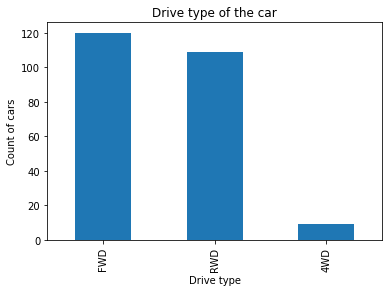

In [18]:
# Task 2 Subsection 1
#import matplotlib to draw graphs
import matplotlib.pyplot as plt
#Graph of drive type of cars (nominal values)
automobile['Drive wheels'].value_counts().plot(kind = 'bar') #creates a bar chart
plt.xlabel('Drive type') #labels x axis
plt.ylabel('Count of cars') #labels y axis
plt.title('Drive type of the car') #labels title

Text(0.5, 1.0, 'Density plot of Insurance Risk Rating')

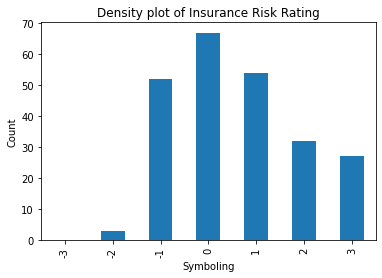

In [19]:
# Graph of Symboling (ordinal values)
symbol_order=[-3,-2,-1,0,1,2,3] #sets the symboling order for the x axis
automobile['Symboling'].value_counts().loc[symbol_order].plot(kind='bar') #creates the bar chart using the count of cars
plt.xlabel('Symboling') #labels x axis
plt.ylabel('Count') #labels y axis
plt.title('Density plot of Insurance Risk Rating') #labels title

Text(0.5, 1.0, 'Boxplot of Horsepower')

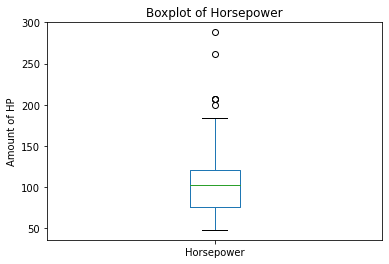

In [20]:
# Graph of horsepower (numerical values)
automobile['Horsepower'].plot(kind='box') #creates a boxplot
plt.ylabel('Amount of HP') #labels y axis
plt.title('Boxplot of Horsepower') #labels title

Text(0, 0.5, 'Horsepower')

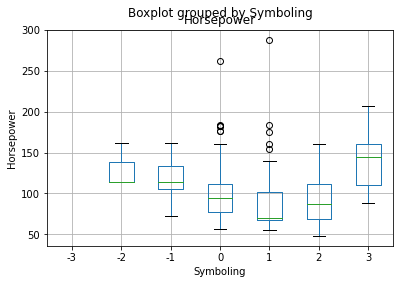

In [21]:
# Task 2 subsection 2
# create a boxplot of horsepower grouped by symboling
automobile.boxplot(column='Horsepower', by='Symboling') 
plt.ylabel('Horsepower') #labels y axis

Text(0, 0.5, 'Normalised losses')

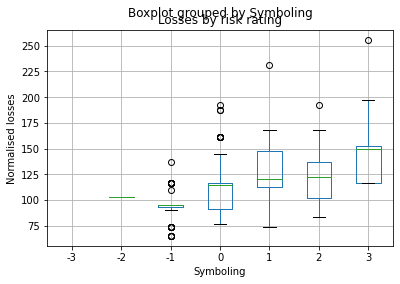

In [22]:
# create a boxplot chart of normalised losses grouped by symboling
automobile.boxplot(column='Normalised losses', by='Symboling')
plt.title('Losses by risk rating') # labels title
plt.ylabel('Normalised losses') # labels y axis

Text(0.5, 1.0, 'Fuel Efficiency by Engine Size')

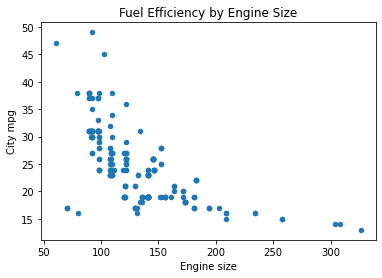

In [23]:
# create a scatter plot of city mpg by engine size
automobile.plot(kind='scatter',
               x='Engine size', y='City mpg')
plt.title('Fuel Efficiency by Engine Size')  # labels title

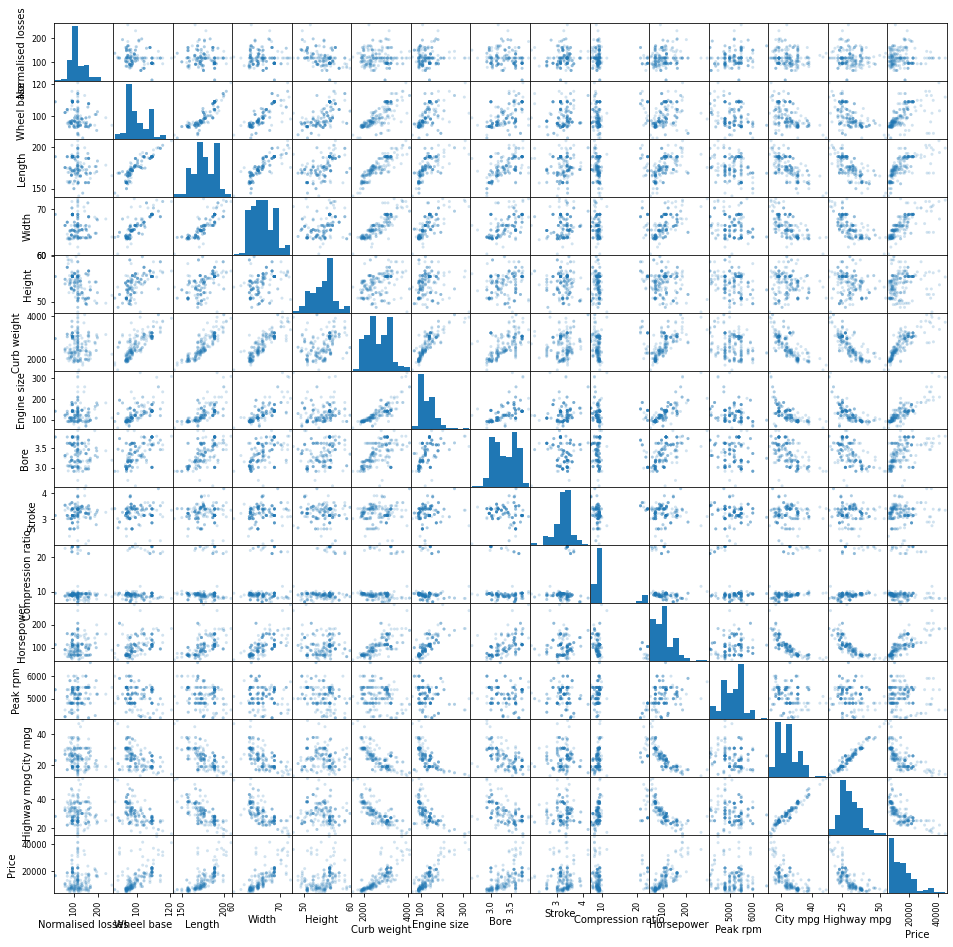

In [24]:
#Task 2 subsection 3
#import scatter_matrix to create this visualisation
from pandas.plotting import scatter_matrix
auto_num = automobile.select_dtypes(include=np.number) #selects numerical data types
scatter_matrix(auto_num, alpha=0.2,figsize=(16,16),diagonal='hist') #sets the parameters, size etc for the scatter matrix
plt.show()